### Analysis For Instagram Reach Dataset
- In this project, I will work on Instagram Reach Dataset which contains data about posts reach,engagement and user interactions.

### Dataset Field Description
---
- Below is a description of column fields in the dataset:
----
### Core Fields

- **impressions**: total number of times the post was displayed.

- **From Home**: number of impressions coming from users’ home feed.

- **From Hashtags**: number of impressions generated from hashtags used in the post.

- **From Explore**: number of impressions from Instagram Explore page.

- **From Other**: number of impressions from other sources (e.g., shares, profile, direct).

- **Saves**: number of times the post was saved by users.

- **comments**: number of comments received.

- **shares**: number of times the post was shared.

- **Likes**: total likes received on the pos.

- **profile Visits**: number of visits to the profile generated by the post).

- **Follows**: number of new followers gained from the post

- **Caption**: the written text included in the post

- **hashtags**: hashtags used in the post caption.

#### Questions to be Answered depending on the Analysis

1. Which source (Home, Hashtags, Explore, Other) contributes the most to total impressions?

2. Is there a relationship between the number of hashtags used and the impressions from hashtags?

3. Do posts with higher likes lead to more profile visits?

4. Which interaction type (Likes, Comments, Shares, Saves) has the strongest impact on gaining new followers?

5. Is there a correlation between the number of saves and the number of profile visits?

6. What is the Follow Percent of profile visits to follows? (Follow Percent = Follows ÷ Profile Visits × 100)

7. Which posts have the highest total interactions? (Likes + Comments + Shares + Saves)

8. Does caption length affect engagement or impressions?

9. Which posts achieve the highest engagement rate relative to their impressions?

10. Do more hashtags always improve performance, or can fewer targeted hashtags be more effective?

In [1]:
# Load needed Modules
import pandas as pd 

### Data Wrangling 
- Data Assessinbg by printing the first five Rows 

In [2]:
# Load the dataset into Data Frame
df=pd.read_csv(r"F:\Data Analysis\Python\مشروع\LEC 2\Instagram data.csv", encoding='latin1')

In [3]:
# display first rows 
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [4]:
# check for dataframe shape 
df.shape

(119, 13)

- we found that the data has around 119 Profile (row) with 13 feature (column)

In [5]:
## Check for data info (quality)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [6]:
#List all data Columns 
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [28]:
# check for Duplicates 
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

### feature Engineering

- Added Engagement Rate column = (Likes + Comments + Shares + Saves) ÷ Impressions

- Added Conversion Rate column = Follows ÷ Profile Visits

- Added Total Interactions column = Likes + Comments + Shares + Saves

- Added Hashtag Count column = Number of hashtags used in each post

- Added Caption Length column = Number of characters in caption

In [8]:
# copy the dataframe
df_copy = df.copy()

- **The dataset is relatively clean with no missing values.**

- **No duplicate rows were found after checking.**

- **Some values (e.g., impressions, likes) appear repeated across posts, but these are original data points and not duplicates.**

- **No further cleaning was required.**

In [9]:
df['Engagement_Percent']= (df['Likes'] + df['Comments'] + df['Shares'] + df['Saves']) / df['Impressions']

In [10]:
df['Follow_Percent']= df['Follows'] /df ['Profile Visits']*100

In [11]:
df['Total_Actions']=df['Likes'] + df['Comments'] + df['Shares'] + df['Saves']

In [12]:
df['Num_Hashtags'] = df['Hashtags'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

In [13]:
df['Caption_Chars'] = df['Caption'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

In [14]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Engagement_Percent,Follow_Percent,Total_Actions,Num_Hashtags,Caption_Chars
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,0.069898,5.714286,274,22,112
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,0.081387,20.833333,439,18,187
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,0.045760,19.354839,184,18,117
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,0.088781,34.782609,402,11,202
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,0.090548,0.000000,228,29,178


In [15]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement_Percent',
       'Follow_Percent', 'Total_Actions', 'Num_Hashtags', 'Caption_Chars'],
      dtype='object')

In [16]:
df.describe().round(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Engagement_Percent,Follow_Percent,Total_Actions,Num_Hashtags,Caption_Chars
count,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00,119.00
mean,5703.99,2475.79,1887.51,1078.10,171.09,153.31,6.66,9.36,173.78,50.62,20.76,0.06,38.19,343.12,18.97,192.46
std,4843.78,1489.39,1884.36,2613.03,289.43,156.32,3.54,10.09,82.38,87.09,40.92,0.02,32.96,238.85,4.85,141.76
min,1941.00,1133.00,116.00,0.00,9.00,22.00,0.00,0.00,72.00,4.00,0.00,0.03,0.00,104.00,10.00,44.00
25%,3467.00,1945.00,726.00,157.50,38.00,65.00,4.00,3.00,121.50,15.00,4.00,0.05,19.05,202.50,17.00,90.50
50%,4289.00,2207.00,1278.00,326.00,74.00,109.00,6.00,6.00,151.00,23.00,8.00,0.06,31.58,288.00,18.00,156.00
75%,6138.00,2602.50,2363.50,689.50,196.00,169.00,8.00,13.50,204.00,42.00,18.00,0.08,46.15,379.50,21.00,235.00
max,36919.00,13473.00,11817.00,17414.00,2547.00,1095.00,19.00,75.00,549.00,611.00,260.00,0.13,218.18,1721.00,30.00,784.00


#### 1. ***Which source (Home, Hashtags, Explore, Other) contributes the most to total impressions?***

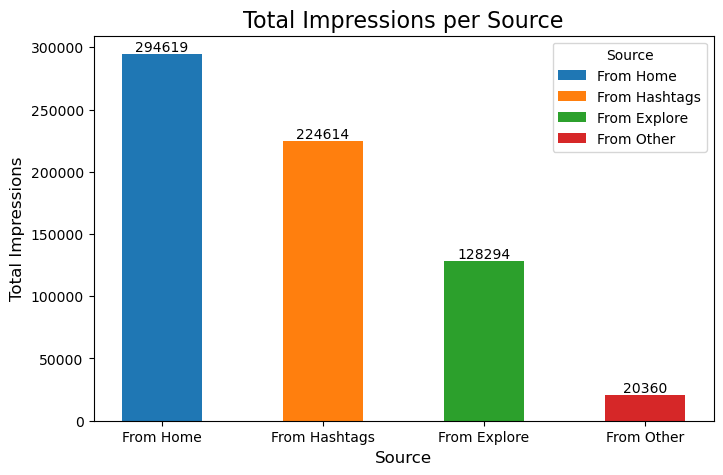

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns and total sums
source_cols = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
total_impressions_per_source = df[source_cols].sum()

# إعداد الألوان لكل عمود
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # كل عمود لون مختلف

# رسم الرسم البياني
plt.figure(figsize=(8,5))  # حجم الشكل (width, height)
bars = plt.bar(total_impressions_per_source.index, total_impressions_per_source.values, color=colors, width=0.5)  # width = سمك العمود

# إضافة العنوان والمحاور
plt.title("Total Impressions per Source", fontsize=16)
plt.xlabel("Source", fontsize=12)
plt.ylabel("Total Impressions", fontsize=12)

# إضافة القيم فوق الأعمدة
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

# إضافة مفتاح (Legend)
plt.legend(bars, total_impressions_per_source.index, title="Source", loc="upper right")

plt.show()


#### 2. ***Is there a relationship between the number of hashtags used and the impressions from hashtags?***

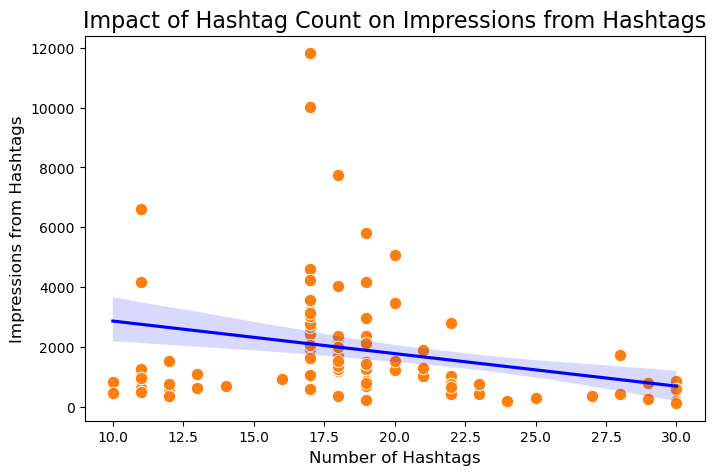

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Num_Hashtags', y='From Hashtags', color='#ff7f0e', s=80)
sns.regplot(data=df, x='Num_Hashtags', y='From Hashtags', scatter=False, color='blue')
plt.title("Impact of Hashtag Count on Impressions from Hashtags", fontsize=16)
plt.xlabel("Number of Hashtags", fontsize=12)
plt.ylabel("Impressions from Hashtags", fontsize=12)
plt.show()

- ****Using more hashtags doesn’t guarantee higher reach — most impressions come from posts with around 17–22 hashtags, highlighting the importance of quality over quantity..****

#### 3. ***Do posts with higher likes lead to more profile visits?***


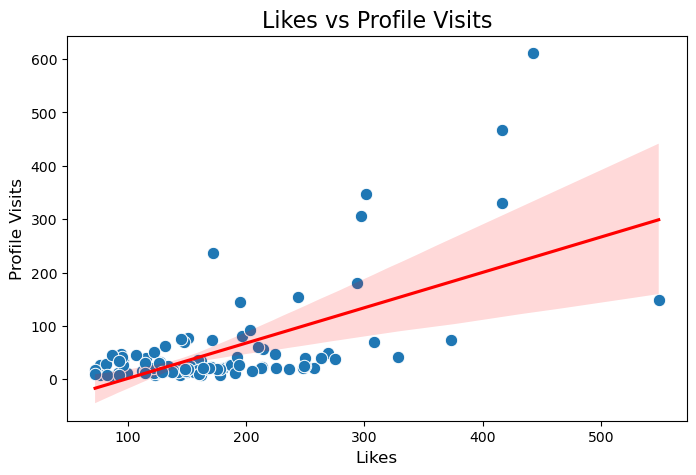

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Likes', y='Profile Visits', color='#1f77b4', s=80)
sns.regplot(data=df, x='Likes', y='Profile Visits', scatter=False, color='red')
plt.title("Likes vs Profile Visits", fontsize=16)
plt.xlabel("Likes", fontsize=12)
plt.ylabel("Profile Visits", fontsize=12)
plt.show()


- ****There is a positive correlation between Likes and Profile Visits, indicating that posts with more likes tend to drive more users to visit the profile.****

#### 4. ***Which interaction type (Likes, Comments, Shares, Saves) has the strongest impact on gaining new followers?***

In [20]:
interaction_cols = ['Likes', 'Comments', 'Shares', 'Saves', 'Follows']
corr_matrix = df[interaction_cols].corr()
print(corr_matrix['Follows'].sort_values(ascending=False))


Follows     1.000000
Likes       0.746333
Saves       0.628461
Shares      0.493070
Comments   -0.060631
Name: Follows, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_12196\508322527.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=follow_corr.index, y=follow_corr.values, palette='viridis')


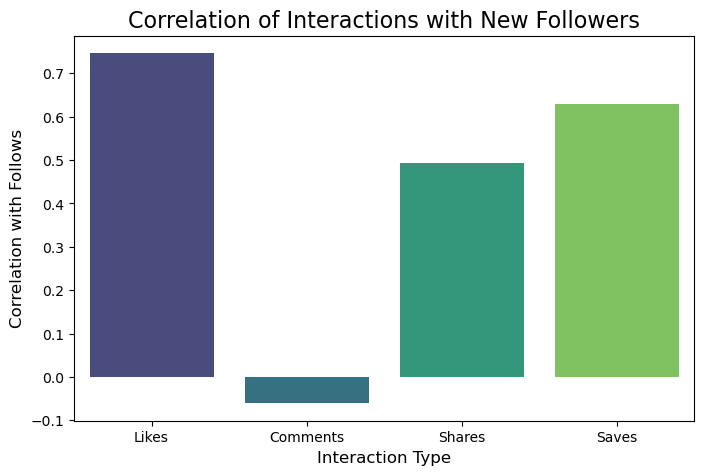

In [21]:
# حساب الارتباط مع Follows
interaction_cols = ['Likes', 'Comments', 'Shares', 'Saves', 'Follows']
corr_matrix = df[interaction_cols].corr()
follow_corr = corr_matrix['Follows'].drop('Follows')  # نستبعد العمود نفسه

# رسم Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(x=follow_corr.index, y=follow_corr.values, palette='viridis')
plt.title("Correlation of Interactions with New Followers", fontsize=16)
plt.ylabel("Correlation with Follows", fontsize=12)
plt.xlabel("Interaction Type", fontsize=12)
plt.show()


- ****The bar plot confirms that Likes have the strongest positive correlation with new followers, followed by Saves and Shares.
Comments show almost no correlation, suggesting that they do not significantly contribute to follower growth.****

#### 5. ***Is there a correlation between the number of saves and the number of profile visits?***

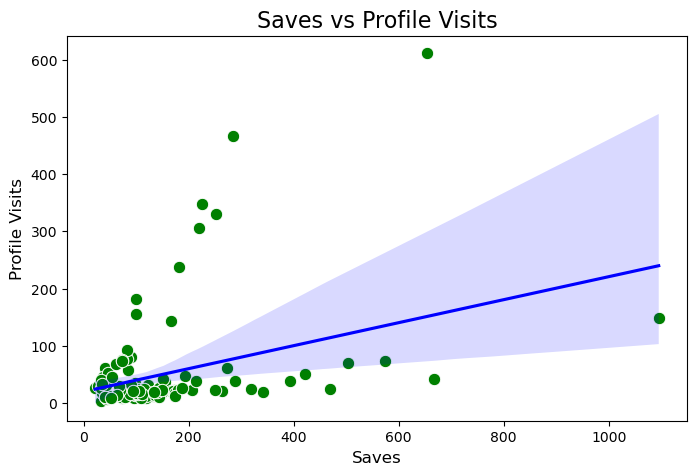

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Saves', y='Profile Visits', color='green', s=80)
sns.regplot(data=df, x='Saves', y='Profile Visits', scatter=False, color='blue')
plt.title("Saves vs Profile Visits", fontsize=16)
plt.xlabel("Saves", fontsize=12)
plt.ylabel("Profile Visits", fontsize=12)
plt.show()


- ****Posts with more saves generally attract more profile visits, but most activity is concentrated in the 0–200 saves range, with only a few outliers driving very high visits.****

#### 6. ***What is the Follow Percent of profile visits to follows? (Follow Percent = Follows ÷ Profile Visits × 100)***

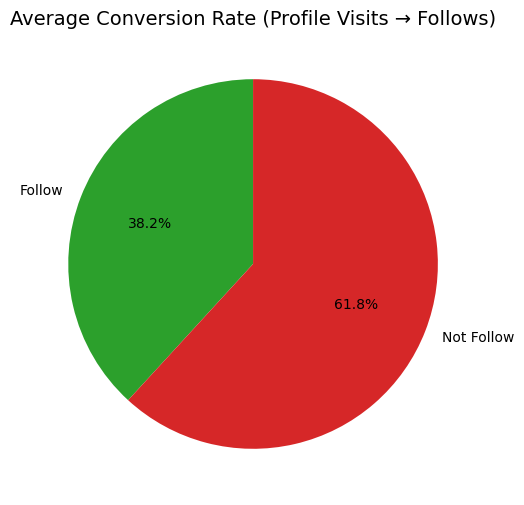

Average Conversion Rate: 38.19%


In [23]:
# نحسب المتوسط
mean_conversion = df['Follow_Percent'].mean()

# القيم
follow = mean_conversion
not_follow = 100 - mean_conversion

# Pie chart
plt.figure(figsize=(6,6))
plt.pie([follow, not_follow], 
        labels=["Follow", "Not Follow"], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=["#2ca02c", "#d62728"])

plt.title("Average Conversion Rate (Profile Visits → Follows)", fontsize=14)
plt.show()

print(f"Average Conversion Rate: {mean_conversion:.2f}%")


- ***On average, 38% of profile visits convert into follows. Most posts stay around this level, but a few achieve exceptionally higher conversion rates, showing strong content effectiveness.***

#### 7. ***Which posts have the highest total interactions? (Likes + Comments + Shares + Saves)***

C:\Users\User\AppData\Local\Temp\ipykernel_12196\3790099077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_posts, x=top_posts.index, y='Total_Actions', palette="viridis")


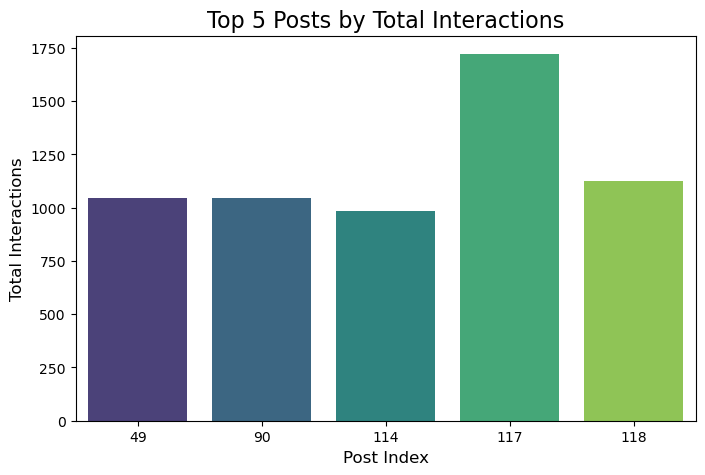

     Caption_Chars  Total_Actions  Likes  Comments  Shares  Saves
117             87           1721    549         2      75   1095
118             79           1127    443         5      26    653
49              91           1045    328         8      41    668
90              91           1045    328         8      41    668
114             87            986    373         2      38    573


In [24]:
# Top 5 posts with highest total interactions
top_posts = df.sort_values(by='Total_Actions', ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(data=top_posts, x=top_posts.index, y='Total_Actions', palette="viridis")

plt.title("Top 5 Posts by Total Interactions", fontsize=16)
plt.xlabel("Post Index", fontsize=12)
plt.ylabel("Total Interactions", fontsize=12)
plt.show()

# عرض جدول مرتب
top_table = top_posts[['Caption_Chars', 'Total_Actions', 'Likes', 'Comments', 'Shares', 'Saves']]
print(top_table.to_string())


- ***The top 5 posts with the highest total interactions are displayed above. These posts combine likes, comments, shares, and saves most effectively to engage the audience.***

#### 8. ***Does caption length affect engagement or impressions?***

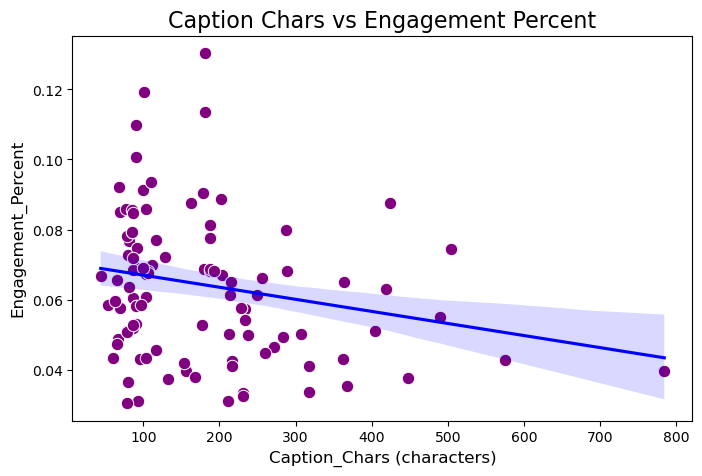

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Caption_Chars', y='Engagement_Percent', color='purple', s=80)
sns.regplot(data=df, x='Caption_Chars', y='Engagement_Percent', scatter=False, color='blue')
plt.title("Caption Chars vs Engagement Percent", fontsize=16)
plt.xlabel("Caption_Chars (characters)", fontsize=12)
plt.ylabel("Engagement_Percent", fontsize=12)
plt.show()


- ***There is a negative relationship between caption length and engagement rate ، suggesting that the length of the caption may have some influence on engagement.***

#### 9. ***Which posts achieve the highest engagement rate relative to their impressions?***

C:\Users\User\AppData\Local\Temp\ipykernel_12196\578155355.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_engagement_posts, x=top_engagement_posts.index, y='Engagement_Percent', palette="magma")


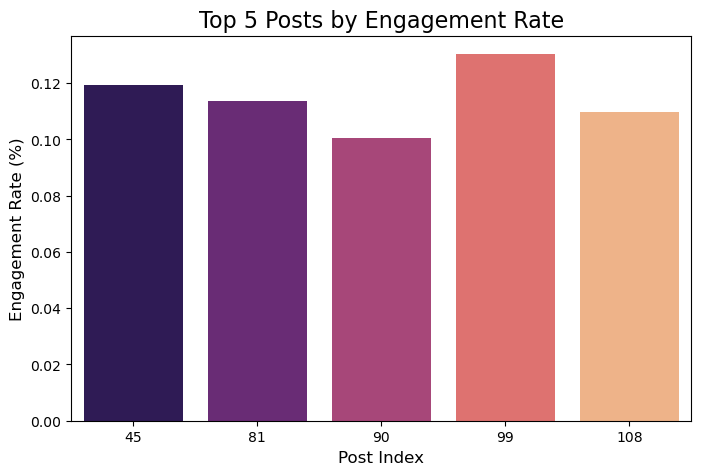

,Caption_Chars,Impressions,Total_Actions,Engagement_Percent
99,181,5409,705,0.130338
45,101,4298,513,0.119358
81,181,5273,599,0.113598
108,91,6814,748,0.109774
90,91,10386,1045,0.100616


In [26]:
# Top 5 posts with highest engagement rate
top_engagement_posts = df.sort_values(by='Engagement_Percent', ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(data=top_engagement_posts, x=top_engagement_posts.index, y='Engagement_Percent', palette="magma")

plt.title("Top 5 Posts by Engagement Rate", fontsize=16)
plt.xlabel("Post Index", fontsize=12)
plt.ylabel("Engagement Rate (%)", fontsize=12)
plt.show()

# Show details
top_engagement_posts[['Caption_Chars', 'Impressions', 'Total_Actions', 'Engagement_Percent']]


- ****the bar plot displays the top 5 posts with the highest engagement percent. These posts generated the most interaction relative to their reach, highlighting the content that resonated best with the audience.****

#### 10. ***Do more hashtags always improve performance, or can fewer targeted hashtags be more effective?***

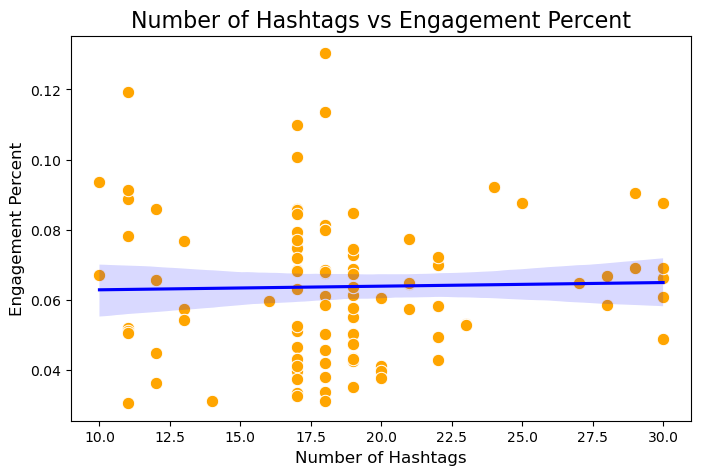

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Num_Hashtags', y='Engagement_Percent', color='orange', s=80)
sns.regplot(data=df, x='Num_Hashtags', y='Engagement_Percent', scatter=False, color='blue')
plt.title("Number of Hashtags vs Engagement Percent", fontsize=16)
plt.xlabel("Number of Hashtags", fontsize=12)
plt.ylabel("Engagement Percent", fontsize=12)
plt.show()


- ***More hashtags don’t always mean better performance.
Posts with a moderate number of hashtags (around 18–22) tend to achieve more consistent engagement.
Using too few or too many hashtags places posts at the edges, where performance becomes less predictable.***

### **Summary**
- ***This analysis explored Instagram post performance across multiple dimensions, including impressions, hashtags, interactions, caption length, and engagement.***
- ***The findings revealed that most impressions come from the Home feed, and while likes strongly influence profile visits and follower growth, other interactions such as saves and shares also play supporting roles.***
- ***Hashtag usage showed diminishing returns beyond a certain range, with quality and relevance proving more important than sheer quantity.***
- ***Caption length was another key factor, where short to medium captions (100–300 characters) consistently delivered better engagement and impressions.***
- ***Overall, the study highlights the balance between content quality, interaction type, and optimized post features to maximize reach and conversions.***

### **Recommendations**

1. Focus on Home Feed Performance

- **Prioritize content that resonates with your current audience, since the majority of impressions come from Home.**

2. Optimize Hashtag Strategy

- **Use 18–22 relevant hashtags instead of spamming too many.**
- **Focus on targeted, niche hashtags that match the post content.**

3. Leverage Likes to Drive Growth

- **Encourage engagement through call-to-actions (e.g., “Like if you agree”).**

- **More likes = more profile visits and higher chance of new followers.**

4. Encourage Saves for Retention
   
**Create valuable, shareable content (tips, guides, infographics) that users want to save for later.**

5. Write Concise Captions

- **Keep captions clear and engaging within 100–300 characters.**

- **Avoid overly long text that reduces visibility and interest.**

6. Track High-Performing Posts

- **Monitor the top posts with highest engagement rate and total interactions.**

- **Replicate successful formats, topics, or styles in future posts.**

7. Measure Conversion Regularly

- **With an average Follow Percent of 38%, analyze what makes certain posts exceed this benchmark and replicate those strategies.**